In [21]:
import math

def euclidean_distance(p1, p2):
    squared_diffs = [(x - y) ** 2 for x, y in zip(p1, p2)]
    return math.sqrt(sum(squared_diffs))

In [22]:
def calculate_mean(points):
    if not points:
        return []
    num_dimensions = len(points[0])
    num_points = len(points)
    means = [0] * num_dimensions
    for point in points:
        for i in range(num_dimensions):
            means[i] += point[i]
    return [m / num_points for m in means]

In [23]:
students = {
    'S01': [85, 83], 'S02': [70, 59], 'S03': [90, 50],
    'S04': [50, 85], 'S05': [50, 50], 'S06': [90, 85]
}
data_points = list(students.values())
student_ids = list(students.keys())

In [24]:
centroids = [students['S01'], students['S02'], students['S03']]
k = 3

print("BÀI 1: THUẬT TOÁN K-MEANS ")
print(f"Trọng tâm ban đầu: {centroids}\n")

BÀI 1: THUẬT TOÁN K-MEANS 
Trọng tâm ban đầu: [[85, 83], [70, 59], [90, 50]]



In [25]:
max_iterations = 10
for iteration in range(max_iterations):
    print(f"Lần lặp thứ {iteration + 1}")

    clusters = [[] for _ in range(k)]
    cluster_indices = [[] for _ in range(k)]

    for i, point in enumerate(data_points):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid_index = distances.index(min(distances))

        clusters[closest_centroid_index].append(point)
        cluster_indices[closest_centroid_index].append(student_ids[i])

    for idx, ids in enumerate(cluster_indices):
        print(f"  Cụm {idx + 1}: {ids}")

    new_centroids = []
    for cluster in clusters:
        if cluster:
            new_centroids.append(calculate_mean(cluster))
        else:
            new_centroids.append(centroids[len(new_centroids)])

    print(f"  Trọng tâm mới: {[[round(v, 2) for v in c] for c in new_centroids]}")
    if new_centroids == centroids:
        print("\n=> Thuật toán đã hội tụ (Trọng tâm không đổi). Dừng vòng lặp.")
        break

    centroids = new_centroids
    print()

Lần lặp thứ 1
  Cụm 1: ['S01', 'S06']
  Cụm 2: ['S02', 'S04', 'S05']
  Cụm 3: ['S03']
  Trọng tâm mới: [[87.5, 84.0], [56.67, 64.67], [90.0, 50.0]]

Lần lặp thứ 2
  Cụm 1: ['S01', 'S06']
  Cụm 2: ['S02', 'S04', 'S05']
  Cụm 3: ['S03']
  Trọng tâm mới: [[87.5, 84.0], [56.67, 64.67], [90.0, 50.0]]

=> Thuật toán đã hội tụ (Trọng tâm không đổi). Dừng vòng lặp.


In [26]:

points_data = {
    'P1': [2.1, 3.1, 1.6], 'P2': [3.2, 3.6, 2.1],
    'P3': [3.6, 3.1, 2.6], 'P4': [7.9, 8.1, 7.6],
    'P5': [8.6, 8.7, 8.2], 'P6': [9.1, 8.1, 8.6],
    'P7': [1.2, 2.1, 1.7]
}

clusters_def = {
    'Cụm A': ['P1', 'P2', 'P3', 'P7'],
    'Cụm B': ['P4', 'P5', 'P6']
}

In [27]:
def get_cluster_of_point(p_id, clusters_dict):
    """Tìm xem điểm p_id thuộc cụm nào"""
    for cluster_name, members in clusters_dict.items():
        if p_id in members:
            return cluster_name, members
    return None, None

def calculate_average_distance(point_coords, list_target_ids, all_points):
    """Tính khoảng cách trung bình từ 1 điểm đến 1 danh sách các điểm khác"""
    if not list_target_ids: return 0
    total_dist = 0
    count = 0
    for target_id in list_target_ids:
        dist = euclidean_distance(point_coords, all_points[target_id])
        total_dist += dist
        count += 1
    return total_dist / count if count > 0 else 0

In [28]:
total_silhouette = 0
num_points = len(points_data)

print(f"{'Điểm':<5} | {'Cụm':<6} | {'a(i)':<6} | {'b(i)':<6} | {'s(i)':<6}")
print("-" * 40)

for p_id, p_coords in points_data.items():
    current_cluster_name, current_members = get_cluster_of_point(p_id, clusters_def)
    same_cluster_others = [m for m in current_members if m != p_id]
    a_i = calculate_average_distance(p_coords, same_cluster_others, points_data)
    min_avg_dist_other = float('inf')

    for other_cluster_name, other_members in clusters_def.items():
        if other_cluster_name == current_cluster_name:
            continue

        avg_dist = calculate_average_distance(p_coords, other_members, points_data)
        if avg_dist < min_avg_dist_other:
            min_avg_dist_other = avg_dist

    b_i = min_avg_dist_other

    if max(a_i, b_i) == 0:
        s_i = 0
    else:
        s_i = (b_i - a_i) / max(a_i, b_i)

    total_silhouette += s_i

    print(f"{p_id:<5} | {current_cluster_name[-1]:<6} | {a_i:.3f}  | {b_i:.3f}  | {s_i:.3f}")

mean_silhouette = total_silhouette / num_points
print("-" * 40)
print(f"Trung bình: {mean_silhouette:.4f}")

Điểm  | Cụm    | a(i)   | b(i)   | s(i)  
----------------------------------------
P1    | A      | 1.487  | 10.548  | 0.859
P2    | A      | 1.551  | 9.332  | 0.834
P3    | A      | 1.789  | 9.065  | 0.803
P4    | B      | 1.331  | 9.320  | 0.857
P5    | B      | 0.989  | 10.415  | 0.905
P6    | B      | 1.220  | 10.648  | 0.885
P7    | A      | 2.211  | 11.565  | 0.809
----------------------------------------
Trung bình: 0.8503


In [29]:
import numpy as np

def kmeans_plus_plus_init(X, K, random_state=42):
    np.random.seed(random_state)
    N = X.shape[0]
    centroids = []
    first_idx = np.random.choice(N)
    centroids.append(X[first_idx])
    for _ in range(1, K):
        dists = np.array([
            min(np.sum((x - c)**2) for c in centroids)
            for x in X
        ])
        probs = dists / dists.sum()
        new_idx = np.random.choice(N, p=probs)
        centroids.append(X[new_idx])

    return np.array(centroids)


In [30]:
def kmeans(X, K, max_iter=100, random_state=42):
    centroids = kmeans_plus_plus_init(X, K, random_state)
    for _ in range(max_iter):
        # Gán cụm
        labels = np.array([
            np.argmin([np.linalg.norm(x - c) for c in centroids])
            for x in X
        ])
        new_centroids = np.array([
            X[labels == k].mean(axis=0) if np.any(labels == k) else centroids[k]
            for k in range(K)
        ])
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels


In [31]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=42)
centroids, labels = kmeans(X, K=4)

print("Centroids:")
print(centroids)


Centroids:
[[ 4.7182049   2.04179676]
 [-8.87357218  7.17458342]
 [-6.83235205 -6.83045748]
 [-2.70981136  8.97143336]]


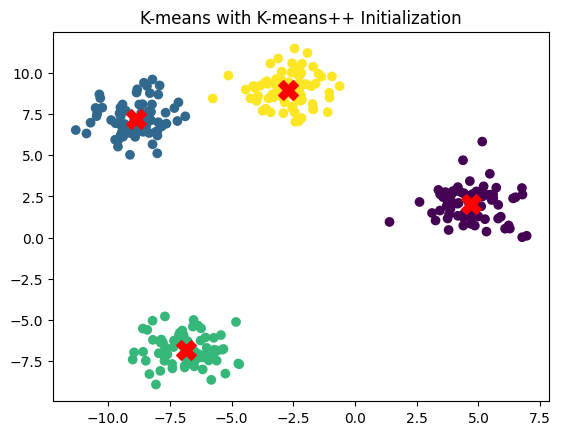

In [32]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, marker='X')
plt.title("K-means with K-means++ Initialization")
plt.show()
